In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import LSTM, Dense, Embedding, Input
from tensorflow.keras.models import Model
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Import JSON file
file_data = 'Data/match_1.json'

In [3]:
# Function to load the contents of the JSON file

def load_json_file(file):
    with open(file, 'r') as f:
        data = json.load(f)
    return data

In [4]:
# Call function to load data into data_df
data_df = load_json_file(file_data)

In [5]:
# Create a pandas DataFrame to simplify analysis
df = pd.DataFrame(data_df)

In [6]:
# General presentation
print("Introducing df:")
print(df.info())

Introducing df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   574 non-null    object
 1   norm    574 non-null    object
dtypes: object(2)
memory usage: 9.1+ KB
None


It seems you have a DataFrame with 574 entries and two different columns.

*   The first column is called "label" and contains object data indicating classification information.
*   Similarly, the second column, called "Norm", also contains object data (acceleration list).



>  Note that there appear to be no missing values in these columns, as indicated by the non-zero number of 574 in each column.



In [7]:
# Show statistical overview for the "norm" column.
print("\nStatic review of the \"norm\" column:")
print(df['norm'].describe())


Static review of the "norm" column:
count                                                   574
unique                                                  574
top       [23.177037336396975, 23.36152528524938, 21.535...
freq                                                      1
Name: norm, dtype: object


This statistical description of the "norm" column suggests the following information:


*   The total number of entries in the column is 574.
*   There are 574 unique values in this column, indicating that each value is different.
*   This most frequent value appears only once (freq = 1).








# ***`Distribution of Actions`***

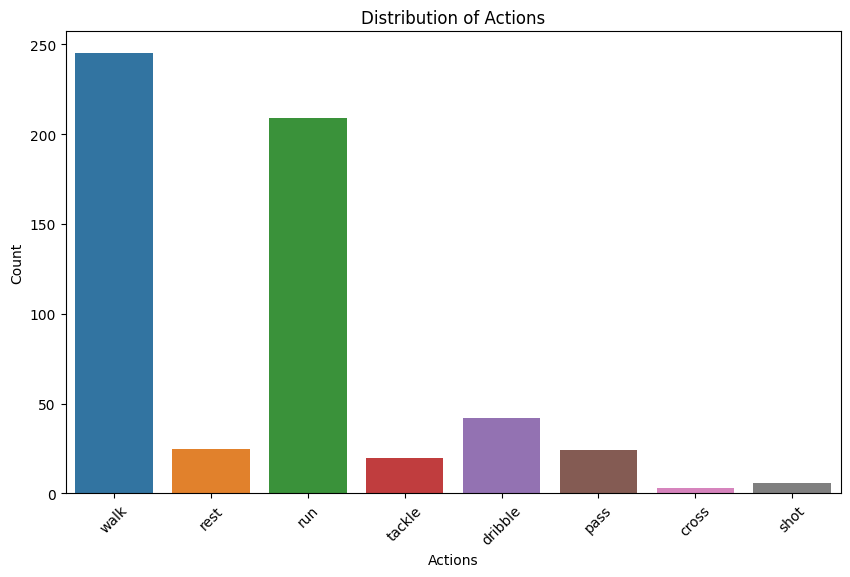

In [8]:
# Distribution of actions according to their occurrence.
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='label')
plt.title("Distribution of Actions")
plt.xlabel("Actions")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

This view provides a quick perspective on the distribution of the various actions listed in the "label" column, and highlights the most frequent actions in relation to those less common.
In our example, "walk" is the most frequently performed action.
**Our data are unbalanced.**

## Acceleration Time Series for **Walk**

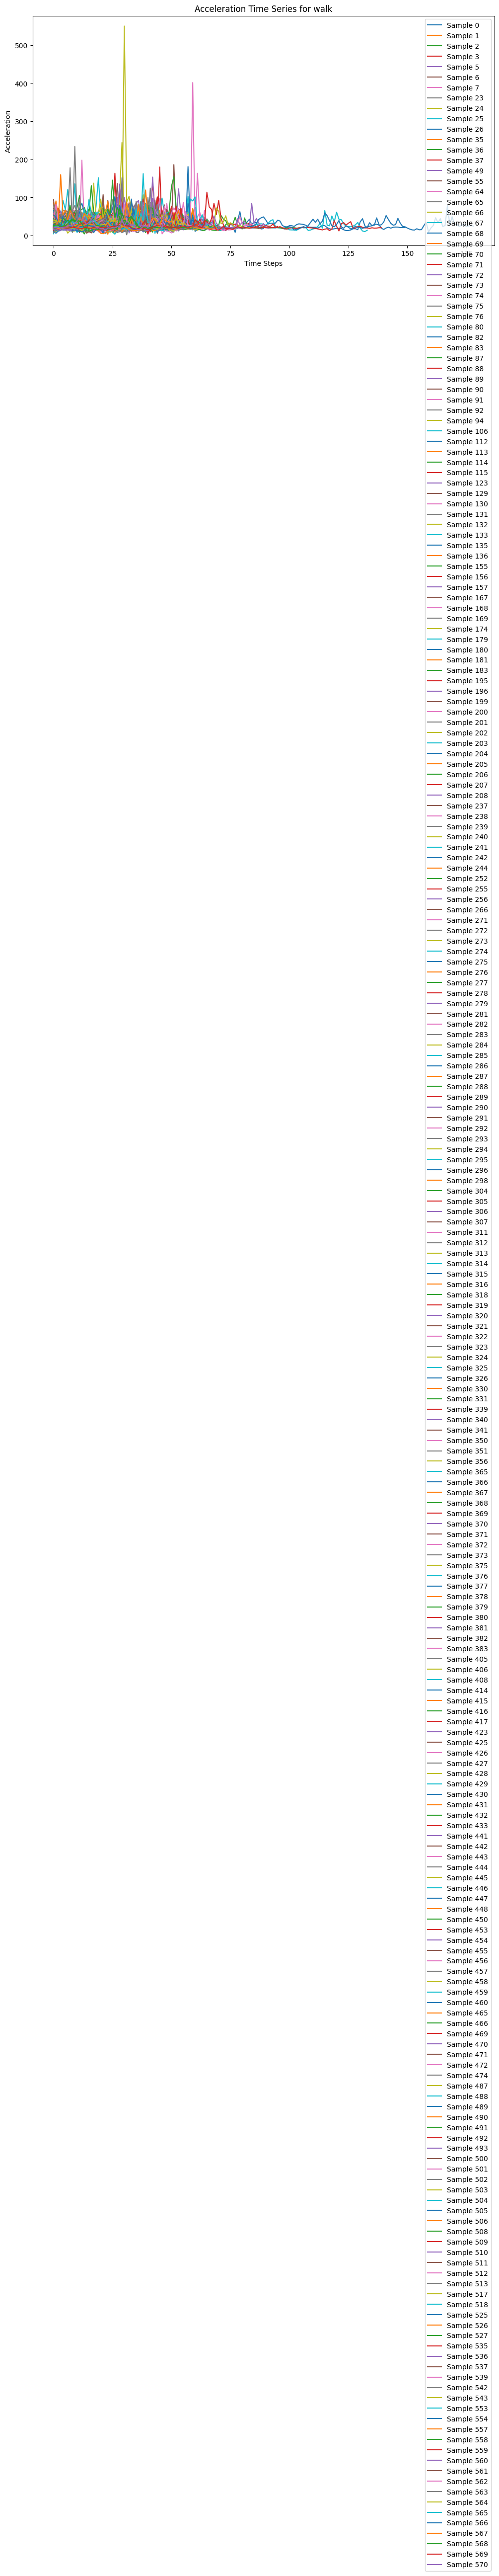

In [9]:
# Time Series Visualization for a specific action (e.g., 'walk')
action_to_plot = 'walk'
subset_df = df[df['label'] == action_to_plot]
plt.figure(figsize=(12, 6))
for idx, row in subset_df.iterrows():
    plt.plot(row['norm'], label=f'Sample {idx}')
plt.title(f"Acceleration Time Series for {action_to_plot}")
plt.xlabel("Time Steps")
plt.ylabel("Acceleration")
plt.legend(loc='upper right')
plt.show()


## Acceleration Time Series for **Run**

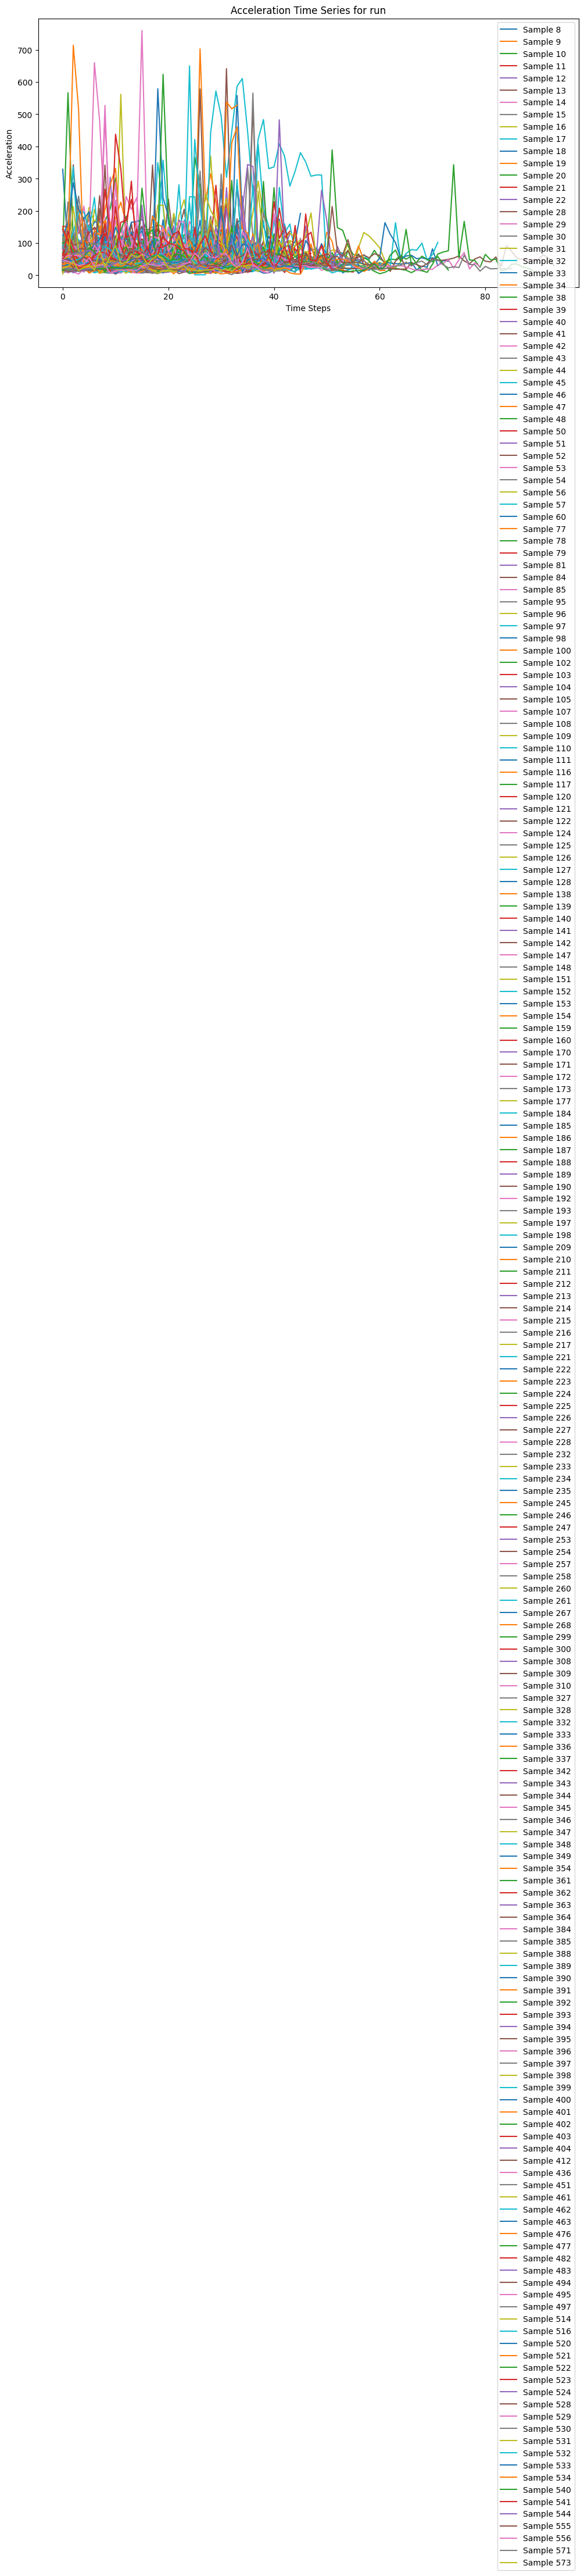

In [ ]:
# Time Series Visualization for a specific action (e.g., 'run')
action_to_plot = 'run'
subset_df = df[df['label'] == action_to_plot]
plt.figure(figsize=(12, 6))
for idx, row in subset_df.iterrows():
    plt.plot(row['norm'], label=f'Sample {idx}')
plt.title(f"Acceleration Time Series for {action_to_plot}")
plt.xlabel("Time Steps")
plt.ylabel("Acceleration")
plt.legend(loc='upper right')
plt.show()

## Acceleration Time Series for **Dribble**

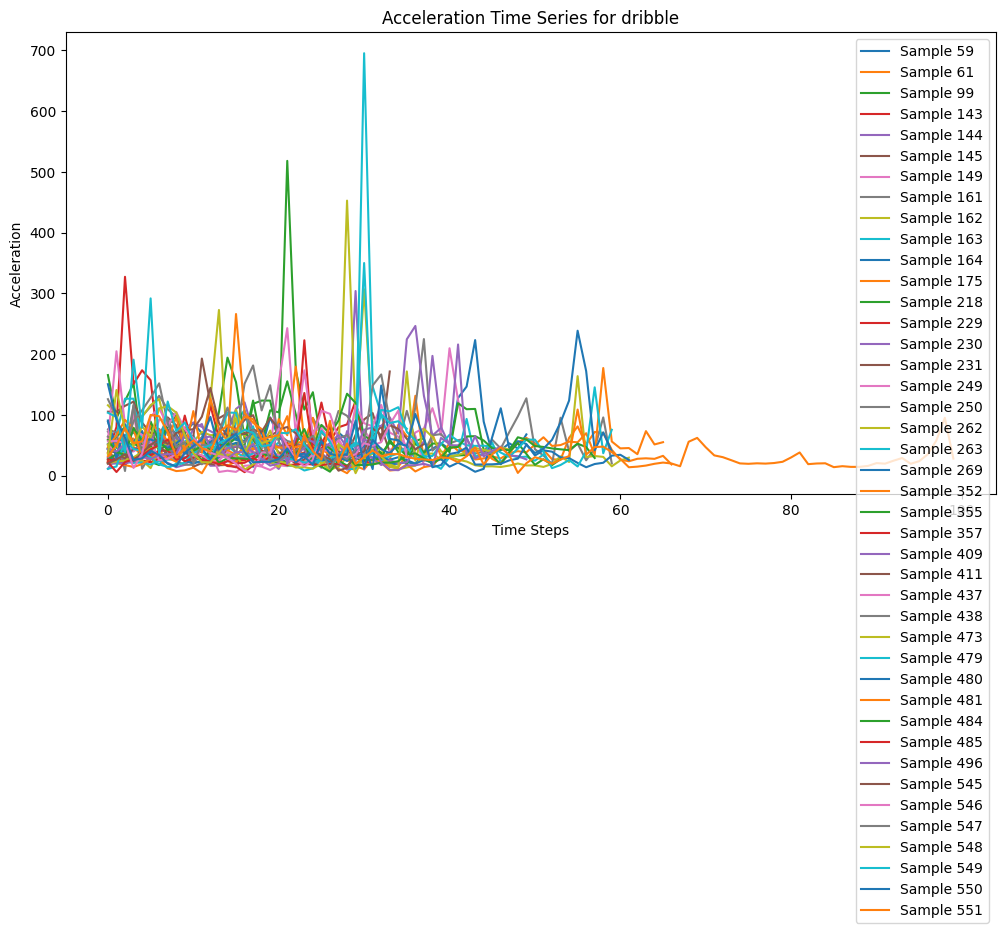

In [ ]:
# Time Series Visualization for a specific action (e.g., 'dribble')
action_to_plot = 'dribble'
subset_df = df[df['label'] == action_to_plot]
plt.figure(figsize=(12, 6))
for idx, row in subset_df.iterrows():
    plt.plot(row['norm'], label=f'Sample {idx}')
plt.title(f"Acceleration Time Series for {action_to_plot}")
plt.xlabel("Time Steps")
plt.ylabel("Acceleration")
plt.legend(loc='upper right')
plt.show()

## Acceleration Time Series for **Rest**

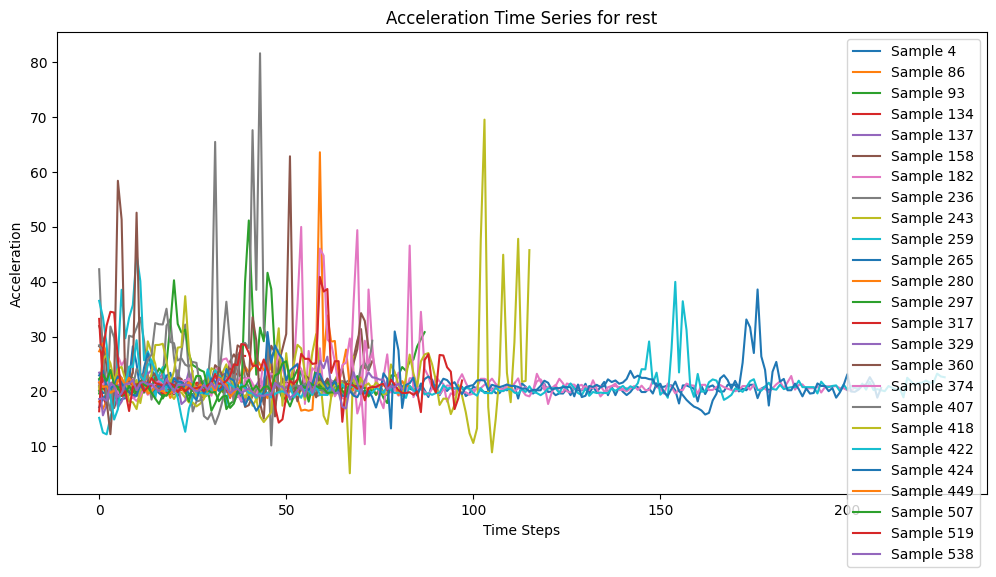

In [ ]:
# Time Series Visualization for a specific action (e.g., 'rest')
action_to_plot = 'rest'
subset_df = df[df['label'] == action_to_plot]
plt.figure(figsize=(12, 6))
for idx, row in subset_df.iterrows():
    plt.plot(row['norm'], label=f'Sample {idx}')
plt.title(f"Acceleration Time Series for {action_to_plot}")
plt.xlabel("Time Steps")
plt.ylabel("Acceleration")
plt.legend(loc='upper right')
plt.show()

Using the time series of accelerations for each action, we can capture the dynamic variations in player movement during a soccer match.(capture the specific dynamics of each action)

## Average Duration of Actions

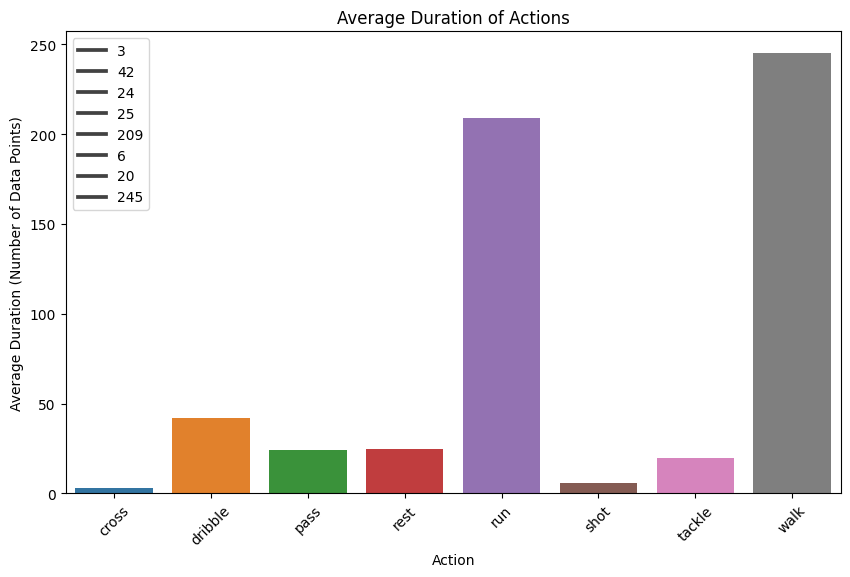

In [10]:
# Action Duration Analysis
action_durations = df.groupby('label', group_keys=False)['norm'].apply(lambda x: len(x))
plt.figure(figsize=(10, 6))
sns.barplot(x=action_durations.index, y=action_durations.values)
plt.title("Average Duration of Actions")
plt.xlabel("Action")
plt.ylabel("Average Duration (Number of Data Points)")
plt.legend(action_durations)
plt.xticks(rotation=45)
plt.show()

The action duration analysis provides insights into the average length of each action.

In [11]:
for i in df['label'].unique():
    av_len_action=[len(l) for l in df[df['label']==i]['norm']]
    print("Average length of the gait "+i,np.mean(av_len_action))

Average length of the gait walk 55.74285714285714
Average length of the gait rest 89.52
Average length of the gait run 38.33014354066986
Average length of the gait tackle 44.2
Average length of the gait dribble 41.595238095238095
Average length of the gait pass 40.125
Average length of the gait cross 60.0
Average length of the gait shot 27.833333333333332


Calculating the average length of acceleration sequences for each action provides information on the temporal dimension of the soccer game.

## Correlation Matrix

In [13]:
medians = df.groupby('label')['norm'].apply(lambda x: np.median(x)).reset_index()
print(medians)

     label                                               norm
0    cross  [47.15264618034176, 63.33201347720716, 50.8108...
1  dribble  [21.834343318715675, 11.070518695954991, 25.23...
2     pass  [28.48066778952845, 36.48743289093199, 32.3877...
3     rest  [21.69143173823108, 15.635489536180463, 17.463...
4      run  [38.45769686117842, 31.43107750438207, 23.0030...
5     shot  [21.421137279314276, 32.25474163868994, 28.562...
6   tackle  [15.649280507407104, 26.93326247055274, 17.895...
7     walk  [20.96480807554311, 18.12680189829923, 16.4916...


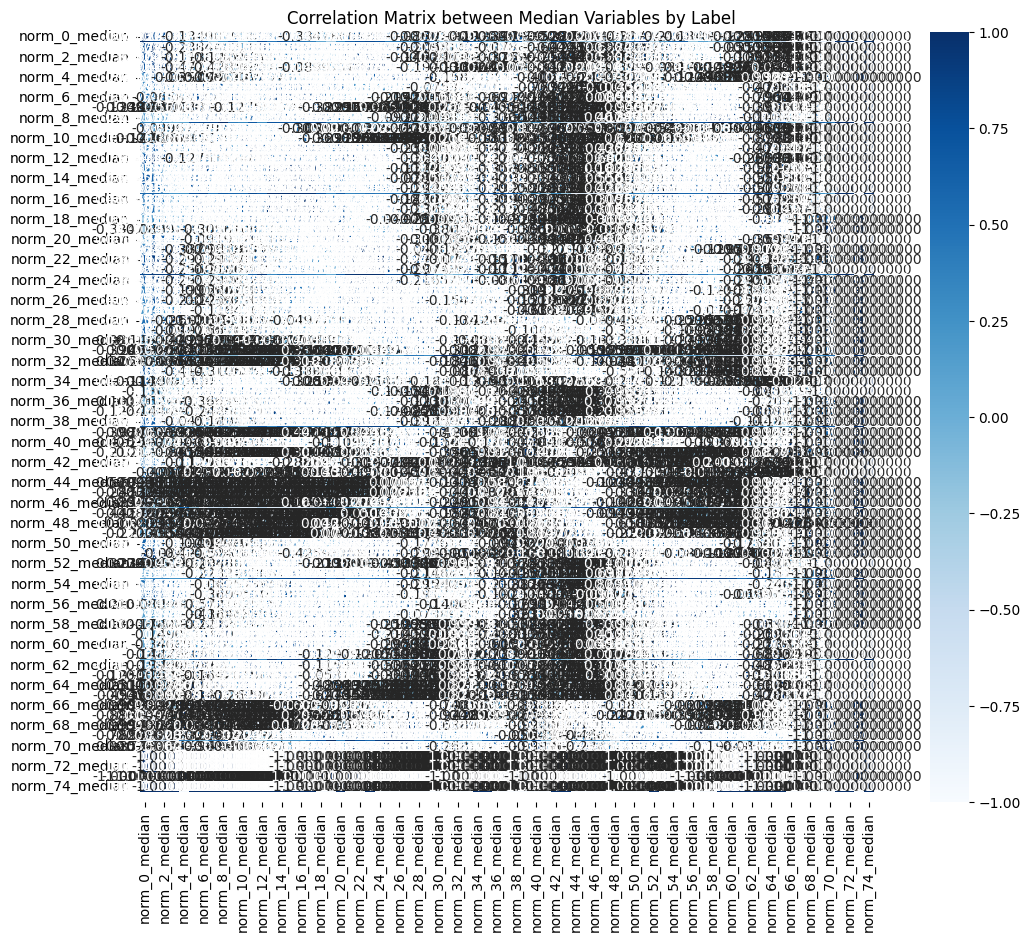

In [14]:
# Create a column for each variable containing the median of 'norm'.
max_length = max(len(entry) for entry in medians['norm'])
for i in range(max_length):
    medians[f'norm_{i}_median'] = medians['norm'].apply(lambda x: x[i] if i < len(x) else None)

# Calculate the correlation matrix
correlation_matrix = medians.corr(numeric_only = True)

# Show a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".10f", cmap="Blues")
plt.title('Correlation Matrix between Median Variables by Label')
plt.show()



In [15]:
medians.corr(numeric_only = True)

norm_0_median  norm_1_median  norm_2_median  norm_3_median  \
norm_0_median        1.000000       0.793373       0.782029       0.754424   
norm_1_median        0.793373       1.000000       0.883746       0.872538   
norm_2_median        0.782029       0.883746       1.000000       0.902193   
norm_3_median        0.754424       0.872538       0.902193       1.000000   
norm_4_median        0.296801       0.709925       0.517987       0.637346   
...                       ...            ...            ...            ...   
norm_71_median       1.000000       1.000000       1.000000       1.000000   
norm_72_median       1.000000       1.000000       1.000000       1.000000   
norm_73_median      -1.000000      -1.000000      -1.000000      -1.000000   
norm_74_median       1.000000       1.000000       1.000000       1.000000   
norm_75_median            NaN            NaN            NaN            NaN   

                norm_4_median  norm_5_median  norm_6_median  norm_7_median  \
norm_0_median        0.296801       0.341289       0.532164      -0.134902   
norm_1_median        0.709925       0.443097       0.351242      -0.238440   
norm_2_median        0.517987       0.359703       0.377915      -0.118807   
norm_3_median        0.637346       0.098713       0.037532      -0.472772   
norm_4_median        1.000000       0.449121      -0.065830      -0.357562   
...                       ...            ...            ...            ...   
norm_71_median      -1.000000       1.000000       1.000000       1.000000   
norm_72_median      -1.000000       1.000000       1.000000       1.000000   
norm_73_median       1.000000      -1.000000      -1.000000      -1.000000   
norm_74_median      -1.000000       1.000000       1.000000       1.000000   
norm_75_median            NaN            NaN            NaN            NaN   

                norm_8_median  norm_9_median  ...  norm_66_median  \
norm_0_median        0.281037       0.633634  ...       -0.990753   
norm_1_median        0.212685       0.225377  ...       -0.999922   
norm_2_median        0.275930       0.138322  ...       -0.982397   
norm_3_median        0.015863       0.007065  ...       -0.301891   
norm_4_median        0.067571      -0.099673  ...        0.932346   
...                       ...            ...  ...             ...   
norm_71_median       1.000000       1.000000  ...       -1.000000   
norm_72_median       1.000000       1.000000  ...       -1.000000   
norm_73_median      -1.000000      -1.000000  ...        1.000000   
norm_74_median       1.000000       1.000000  ...       -1.000000   
norm_75_median            NaN            NaN  ...             NaN   

                norm_67_median  norm_68_median  norm_69_median  \
norm_0_median        -0.886144       -0.999991       -0.782679   
norm_1_median        -0.936507       -0.991854       -0.699990   
norm_2_median        -0.987570       -0.946638       -0.543794   
norm_3_median         0.039054       -0.432196       -0.897741   
norm_4_median         0.999707        0.872648        0.382879   
...                        ...             ...             ...   
norm_71_median       -1.000000       -1.000000       -1.000000   
norm_72_median       -1.000000       -1.000000       -1.000000   
norm_73_median        1.000000        1.000000        1.000000   
norm_74_median       -1.000000       -1.000000       -1.000000   
norm_75_median             NaN             NaN             NaN   

                norm_70_median  norm_71_median  norm_72_median  \
norm_0_median        -0.910746             1.0             1.0   
norm_1_median        -0.852899             1.0             1.0   
norm_2_median        -0.731882             1.0             1.0   
norm_3_median        -0.763351             1.0             1.0   
norm_4_median         0.596425            -1.0            -1.0   
...                        ...             ...             ...   
norm_71_median       -1.000000             1.0            

By analyzing a **correlation matrix**, we can identify relationships between different variables (norm_i_median) and understand how they change together. It assigns a value between -1 and 1, where:


1.   1 means a perfect positive correlation (as variable norm_0_median increases, variable norm_71_median also increases).
2.  -1 indicates a perfect negative correlation (as variable norm_0_median increases, variable norm_73_median decreases).
3.   0 means no linear correlation.                  




Using the ***median***, we can obtain a more stable measure of centrality that represents the distribution of the data.

***Different Approaches of game entertainment:***

---



***Approach 1: Time series analysis and classification***

* Algorithms: Use time series analysis techniques such as LSTM (Long Short Term Memory) Recurrent Neural Networks to simulate player movement over time.

* Input Data: The input data is a sequence of accelerometer readings (time series data) with appropriate labels.

* Describe:
Capturing the temporal dependence of player actions using an LSTM network.
Train a classification model to predict player actions (labels) based on accelerometer data.
Combine predicted moves together into sequences to recreate the game.

***Approach 2: Hidden Markov Model (HMM)***

* Algorithms: Use Hidden Markov Models to simulate the basic states of player actions and the transitions between them.
* Input Data: The input data is a sequence of accelerometer readings with appropriate labels.
* Describe:
Use an HMM to model latent states (player actions) and their transitions based on observed accelerometer data.
Derive the most likely action sequence for game recovery.

***Approach 3: Sequence-to-sequence model***

* Algorithms: Use sequence-to-sequence models (e.g. Seq2Seq with attention mechanism) to map input accelerometer sequences to output action sequences.

* Input data: pairs of input accelerometer sequences and corresponding action sequences.

* Describe:
Train a sequence-to-sequence model to understand the mapping between accelerometer data and motion.
Use the trained model to generate action sequences that replicate the game.

***Approach 4: Reinforcement Learning (RL)***

* Algorithms: Apply reinforcement learning techniques to learn optimal player behavior through interaction with the environment.

* Input data: accelerometer data and action labels used to train the RL agent.

* Describe: Model a Football game environment using states, actions, rewards, and transitions.
Train an RL agent to maximize rewards by selecting actions based on accelerometer data.
Use the guidelines you learned to recreate the game.

***Approach 5: Multi-modal fusion***

* Algorithms: Combine accelerometer data with other modalities such as video or audio to improve motion recognition and game recovery.

* Input data: multi-modal data, including accelerometer data, video images, audio, etc.

* Describe: Merge information from different modalities to improve action recognition accuracy.
Utilize computer vision and audio processing technology and accelerometer data analysis to achieve richer gaming entertainment.



### Data Preprocessing and Model Building:

***Data pre/post-processing :***

---



**Pre-processing :**

* *Data normalization :* To ensure consistency of scale, accelerometer readings are normalized.

* *Padding:* Sequences are adjusted to a fixed length, guaranteeing a uniform input size for the LSTM network.

* *Label encoding:* Action labels are converted to numerical values via a label encoder to facilitate processing by the model.

* *Data balancing:* To overcome possible imbalances in the actions, techniques such as SMOTE (Synthetic Minority Over-sampling Technique) can be applied to balance the dataset.

**Post-processing :**

* *Decoding:* After the model predictions, the digital labels of the actions are decoded into their original labels using the label encoder.

* *Game sequence generation:* The predicted actions, together with the accelerometer data, are combined to create a game sequence.

In [16]:
# Data refund : Sequences are completed to ensure consistent length.
max_sequence_length = 100
X_padded = tf.keras.preprocessing.sequence.pad_sequences(df['norm'].tolist(), padding='post', maxlen=max_sequence_length, dtype='float32')
print(len(X_padded[0]))
print(len(X_padded[5]))
print(len(X_padded[159]))


100
100
100


All sequences must have the **same length** to be processed by the model.

In [17]:
#Label Encoding: Actions are encoded into numerical labels using the LabelEncoder.
label_encoder = LabelEncoder()
numerical_labels = label_encoder.fit_transform(df['label'])
numerical_labels[:15]


array([7, 7, 7, 7, 3, 7, 7, 7, 4, 4, 4, 4, 4, 4, 4])

In [18]:
print(np.unique(numerical_labels))

[0 1 2 3 4 5 6 7]


Each label is transformed into a number.
Example:
* 7=>walk
* 3=>Rest
* 4=>Run

In [19]:
X = X_padded
y = numerical_labels

Our data are **unbalanced** (interpreting the count graph from the share distribution), so we need to balance it using ***SMOTE*** (Synthetic Minority Over-sampling Technique), an oversampling technique designed to balance the classes in a dataset.

In [20]:
#Data Balancing:  We use SMOTE to balance the dataset to avoid class imbalance.
from imblearn.over_sampling import SMOTE
from collections import Counter
# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=2)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Count the class distribution after SMOTE
print("Class distribution following SMOTE :", Counter(y_resampled))

Class distribution following SMOTE : Counter({7: 245, 3: 245, 4: 245, 6: 245, 1: 245, 2: 245, 0: 245, 5: 245})


In [21]:
#Feature Engineering: You calculate mean and standard deviation features for each sequence.
mean_values = np.mean(X_resampled, axis=1)
std_values = np.std(X_resampled, axis=1)
X_with_mean_std = np.hstack((X_resampled, mean_values.reshape(-1, 1), std_values.reshape(-1, 1)))
X_with_mean_std.shape

(1960, 102)

The addition of the mean and standard deviation std is to add extra information to our model.
* **The mean** gives an idea of the central tendency of the acceleration.
* **The standard deviation** to indicate the dispersion/variability of the acceleration.

These features can help the model to better understand and differentiate between the different types of action in our data, improving its ability to make accurate predictions.

In [22]:
#Splitting your preprocessed data into three sets
X_train, X_temp, y_train, y_temp = train_test_split(X_with_mean_std, y_resampled, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
#y_train_c = tf.keras.utils.to_categorical(y_train, num_classes=8)

This step divides your pre-processed data into three distinct sets:

1. **Training set (X_train, y_train):** is used to train your model

            => Trains it to make predictions.

2. **Validation set (X_val, y_val):** is used to adjust the model's hyperparameters and evaluate its performance during training.
            => Make configuration decisions

3. **Test set (X_test, y_test):** is reserved for evaluating the final performance of your model after training.

## Model Architecture:

In [26]:
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
# Define playstyle labels (e.g., 'attacking', 'defending', 'normal')
playstyle_labels = np.array(['attacking', 'defending', 'normal'])


#building the LSTM model
def build_lstm_model():
# build a model layer by layer, sequentially
    model = models.Sequential()
    model.add(layers.LSTM(128, input_shape=(102, 1), return_sequences=True))
# The layers of dropout are used to avoid the adjustment with a rate of 0.2
    model.add(Dropout(0.2))
    model.add(layers.LSTM(128, return_sequences=True))
    model.add(Dropout(0.2))
# The layer does not return sequences. => Generates a single output.
    model.add(layers.LSTM(64, return_sequences=False))
    model.add(Dropout(0.2))
# A softmax activation function is used to predict the class (it assigns probabilities to each possible class).
    model.add(layers.Dense(8, activation='softmax'))
# Optimizer adam minimizes the loss defined by the "categorical_crossentropy" loss function
# Accuracy gives an overall idea of model performance
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
#Accuracy alone may not be a sufficient metric for assessing a model's performance.
#categorical_crossentropy (loss) is more significant

In [27]:
#This section involves training the LSTM model with weighted loss. You define class weights based on the playstyle
#(e.g., 'attacking' or 'defending') and train the model on the training data
def train_model_with_weighted_loss(model, X_train, y_train, X_val, y_val, epochs, batch_size, playstyle):
    # Define the weight for the loss function based on the playstyle
    if playstyle == 'attacking':
        class_weights = {label_encoder.transform(['shot'])[0]: 8.0,
                         label_encoder.transform(['pass'])[0]: 4.0,
                         label_encoder.transform(['dribble'])[0]: 5.0,
                        label_encoder.transform(['rest'])[0]: 1.0,
                         label_encoder.transform(['walk'])[0]: 1.0,
                         label_encoder.transform(['run'])[0]: 2.0,
                        label_encoder.transform(['tackle'])[0]: 1.0,
                    label_encoder.transform(['cross'])[0]: 3.0}

    elif playstyle == 'defending':
        class_weights = {label_encoder.transform(['shot'])[0]: 0.5,
                         label_encoder.transform(['pass'])[0]: 5.0,
                         label_encoder.transform(['dribble'])[0]: 0.5,
                        label_encoder.transform(['rest'])[0]: 1.0,
                         label_encoder.transform(['walk'])[0]: 1.0,
                         label_encoder.transform(['run'])[0]: 4.0,
                        label_encoder.transform(['tackle'])[0]: 7.0,
                    label_encoder.transform(['cross'])[0]: 3.0}
    else:
        # Default weights for a normal playstyle
        class_weights = None

    # Train the model with the weighted loss function
    history = model.fit(X_train, tf.keras.utils.to_categorical(y_train, num_classes=num_classes),
                        validation_data=(X_val, tf.keras.utils.to_categorical(y_val, num_classes=num_classes)),
                        epochs=100, batch_size=batch_size, class_weight=class_weights)
    return history

# Example usage for generating an attacking game with weighted loss
sequence_length = 102
num_features = 8  # Number of features in your data
num_classes = len(label_encoder.classes_)

# Create an LSTM model
model = build_lstm_model()

# Train the model with weighted loss for attacking playstyle
train_model_with_weighted_loss(model, X_train, y_train, X_val, y_val, epochs=10, batch_size=32, playstyle='attacking')

Epoch 1/100
43/43 [==============================] - 29s 504ms/step - loss: 5.2193 - accuracy: 0.2668 - val_loss: 1.9435 - val_accuracy: 0.2551
Epoch 2/100
43/43 [==============================] - 18s 426ms/step - loss: 4.5523 - accuracy: 0.2981 - val_loss: 1.8696 - val_accuracy: 0.3095
Epoch 3/100
43/43 [==============================] - 18s 420ms/step - loss: 4.2932 - accuracy: 0.3375 - val_loss: 2.1665 - val_accuracy: 0.2925
Epoch 4/100
43/43 [==============================] - 21s 490ms/step - loss: 4.2519 - accuracy: 0.3622 - val_loss: 1.5475 - val_accuracy: 0.4252
Epoch 5/100
43/43 [==============================] - 18s 423ms/step - loss: 3.7949 - accuracy: 0.4570 - val_loss: 1.3748 - val_accuracy: 0.5476
Epoch 6/100
43/43 [==============================] - 18s 425ms/step - loss: 3.4904 - accuracy: 0.5066 - val_loss: 1.3708 - val_accuracy: 0.4932
Epoch 7/100
43/43 [==============================] - 20s 459ms/step - loss: 3.2709 - accuracy: 0.5386 - val_loss: 1.3645 - val_accuracy:

* **Loss:** The "loss" value should ideally be reduced as the model trains (a low loss indicates that the model is learning the characteristics of the training data well).

* **Accuracy**: This is the proportion of correct predictions in relation to the total number of samples.

In our case, loss decreases and accuracy increases => the model is improving.

## Architecture/Algorithm chosen :

The choice to use a Long Short-Term Memory **(LSTM)** architecture is often motivated by the sequential and temporal nature of data such as accelerometer readings over time. LSTMs are a type of recurrent neural network (RNN) specially designed to efficiently process data sequences, making them particularly suited to tasks involving time series, such as acceleration data in our case, to understand player movements during a soccer match.

## Additional information:

*The LSTM architecture* consists of several LSTM layers to capture short- and long-term dependencies in the sequence.

*Weighted loss function:* When we teach the model, we tell it which actions are most important depending on the style of play (Run, Shoot, etc.). This helps the model focus more on key actions to make the game more realistic.

*Hyperparameters:* These are special parameters we can adjust to make the model better. **For example,** we can change the number of smart boxes, decide to drop certain information from time to time, and so on. It's like adjusting the buttons on a radio to get the best station.

In [28]:
#X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)
y__test = tf.keras.utils.to_categorical(y_test, num_classes=8)
y__test[0]

array([0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [29]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y__test)
print(f"Test Accuracy: {test_accuracy}")

10/10 [==============================] - 2s 200ms/step - loss: 0.6262 - accuracy: 0.8129
Test Accuracy: 0.8129251599311829




> 81% of in-game actions were correctly predicted by the model.



10/10 [==============================] - 2s 108ms/step


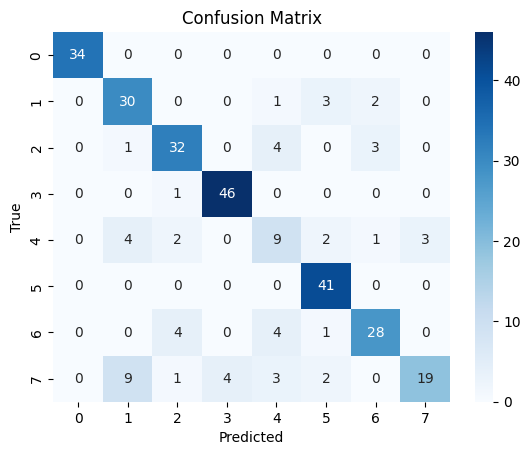

In [30]:
from sklearn.utils.multiclass import unique_labels
y_pred = model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded true labels to class labels
y_true_classes = np.argmax(y__test, axis=1)

class_names = unique_labels(y_true_classes, y_pred_classes)
cm = confusion_matrix(y_true_classes, y_pred_classes)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [32]:
from sklearn.metrics import precision_score
# Accuracy calculation by class
precision_per_class = precision_score(y_true_classes, y_pred_classes, average=None)

# View accuracy by class
print("\nPrécision par Classe :")
for i, precision in enumerate(precision_per_class):
    print(f"Classe {i}: {precision:.2f}")


Précision par Classe :
Classe 0: 1.00
Classe 1: 0.68
Classe 2: 0.80
Classe 3: 0.92
Classe 4: 0.43
Classe 5: 0.84
Classe 6: 0.82
Classe 7: 0.86


For each category, the model accuracy is shown, which indicates how accurately the model predicted that particular category.

=> The higher the accuracy score, the better the model predicts that category.

***Game generation:***

This function takes the trained model, accelerometer data and label encoder as input, and generates a game sequence. At each time step, the next action is predicted using the model and added to the generated play sequence. This function also takes into account the duration of the actions.

In [33]:
import numpy as np

def generate_game_sequences(model, X, label_encoder, num_games=1, num_minutes=10):
    # List to store the generated game sequences
    generated_games = []

    for _ in range(num_games):
        # Define the number of time steps per second
        time_steps_per_second = 0.5  # Each action takes 2 seconds.

        # Calculate the total number of time steps for the specified number of minutes
        num_time_steps = int(num_minutes * 60 * time_steps_per_second)

        # Initialize a game sequence for this iteration
        generated_game = []

        for _ in range(num_time_steps):
            # Append the next accelerometer reading from your dataset
            seed_sequence = X[_ % len(X)]
            # Predict the next action label using the model
            predicted_action = model.predict(np.array([seed_sequence]))

            # Decode the predicted label back to its original form
            predicted_label = label_encoder.inverse_transform(np.argmax(predicted_action, axis=1))

            # Append the predicted action to the generated game
            generated_game.append({'norm': seed_sequence.tolist(), 'label': predicted_label[0]})

        # Append the generated game sequence to the list of games
        generated_games.append(generated_game)

    return generated_games

generated_games = generate_game_sequences(model, X, label_encoder, num_games=3, num_minutes=15)

1/1 [==============================] - 0s 59ms/step


In [ ]:
# Game1
np.array((pd.DataFrame(generated_games[1])['label']))

array(['walk', 'walk', 'walk', 'walk', 'rest', 'walk', 'walk', 'walk',
       'walk', 'pass', 'run', 'pass', 'run', 'tackle', 'dribble',
       'dribble', 'tackle', 'dribble', 'cross', 'run', 'dribble', 'run',
       'walk', 'dribble', 'walk', 'cross', 'cross', 'shot', 'pass',
       'rest', 'rest', 'tackle', 'dribble', 'shot', 'run', 'walk', 'walk',
       'walk', 'walk', 'run', 'dribble', 'run', 'cross', 'dribble', 'run',
       'run', 'run', 'dribble', 'run', 'dribble', 'walk', 'dribble',
       'run', 'cross', 'shot', 'walk', 'run', 'pass', 'run', 'dribble',
       'dribble', 'dribble', 'pass', 'cross', 'walk', 'walk', 'walk',
       'walk', 'walk', 'walk', 'walk', 'walk', 'cross', 'dribble',
       'dribble', 'dribble', 'pass', 'shot', 'pass', 'pass', 'pass',
       'dribble', 'walk', 'walk', 'walk', 'cross', 'rest', 'cross',
       'walk', 'walk', 'cross', 'walk', 'walk', 'rest', 'walk', 'pass',
       'shot', 'shot', 'dribble', 'shot', 'run', 'shot', 'dribble',
       'dribble',

In [38]:
generated_games = generate_game_sequences(model, X, label_encoder, num_games=1, num_minutes=10)

1/1 [==============================] - 0s 53ms/step


In [44]:
# Game 2
np.array((pd.DataFrame(generated_games[0])['label']))

array(['rest', 'walk', 'rest', 'rest', 'rest', 'walk', 'walk', 'walk',
       'walk', 'shot', 'run', 'pass', 'run', 'tackle', 'tackle', 'cross',
       'tackle', 'tackle', 'rest', 'run', 'rest', 'rest', 'rest', 'walk',
       'walk', 'walk', 'rest', 'tackle', 'pass', 'rest', 'dribble',
       'dribble', 'walk', 'tackle', 'dribble', 'walk', 'walk', 'walk',
       'rest', 'rest', 'run', 'rest', 'rest', 'run', 'dribble', 'dribble',
       'dribble', 'run', 'run', 'cross', 'cross', 'rest', 'run', 'rest',
       'run', 'cross', 'run', 'pass', 'rest', 'walk', 'dribble',
       'dribble', 'pass', 'pass', 'rest', 'walk', 'walk', 'walk', 'walk',
       'walk', 'rest', 'walk', 'walk', 'dribble', 'dribble', 'dribble',
       'rest', 'pass', 'pass', 'pass', 'pass', 'rest', 'walk', 'walk',
       'walk', 'walk', 'rest', 'walk', 'walk', 'walk', 'cross', 'walk',
       'walk', 'rest', 'rest', 'shot', 'run', 'run', 'tackle', 'shot',
       'run', 'pass', 'dribble', 'dribble', 'rest', 'pass', 'walk',
 

In [45]:
# Add the ".json" file extension to the user-provided name
file_path = f"{'generated_games'}"

# Save the data as a JSON file in the current working directory
with open(f"{file_path}.json", "w") as json_file:
    json.dump(generated_games, json_file)

print(f"Data saved to JSON file: {file_path}")

Data saved to JSON file: generated_games
